In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-play-store-games/android-games.csv


![https://www.simon-kucher.com/sites/default/files/styles/670xh/public/2020-10/GamingStudy_Part2_Blog%20Header.jpg?itok=4S2Gg_fC](http://)

# Games on phone might not be as elaborate or graphically enticing as computer or console games. 
#### However, nowadays, they are popular more than ever, with **80 billion** mobile game downloads in 2020, with an **18%** YoY growth (*Udonis*)

#### In this article, we would be diving into this publicly available dataset which showcases numerous games on the Google Play Store. We would be doing some exploration with this dataset, checking to see

##### 1. If there is any correlation between its price and its ratings
##### 2. Which categories showcase the highest ratings
##### 3. Does rapid growth right after its release generally suggest greater ratings for the game? 

##### Let us first import the required dataset 

In [2]:
df = pd.read_csv('../input/top-play-store-games/android-games.csv')

# As always, let us look at the data information
#### We would have to 
##### 1. Check for missing data 
##### 2. Deal with missing/invalid data 
##### 3. See whether all rows are eligible for data analysis 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


#### Thankfully, with this dataset, we have 0 null values, and 1730 full rows, with 15 attributes in total 

#### As mentioned in the first few lines, we only need data regarding the price, ratings, category, growth and title attributes 
* ##### So let us trim the dataset

In [4]:
df = df.drop(labels = ['rank', 'installs', 'total ratings'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1730 non-null   object 
 1   average rating    1730 non-null   int64  
 2   growth (30 days)  1730 non-null   float64
 3   growth (60 days)  1730 non-null   float64
 4   price             1730 non-null   float64
 5   category          1730 non-null   object 
 6   5 star ratings    1730 non-null   int64  
 7   4 star ratings    1730 non-null   int64  
 8   3 star ratings    1730 non-null   int64  
 9   2 star ratings    1730 non-null   int64  
 10  1 star ratings    1730 non-null   int64  
 11  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(6), object(2)
memory usage: 150.5+ KB


#### We have succesfully trimmed down our dataset to only the necessary attributes that we would be needing 

#### Now let us proceed about investigating our first question 
# 1. If there is any correlation between its price and its ratings

#### However, before that, let us see how many paid games there are compared to free ones in this dataset

In [5]:
df.paid.describe()

count      1730
unique        2
top       False
freq       1723
Name: paid, dtype: object

#### As shown above, there are only 7 paid games, so our question might not be fairly answered, as the data is very biased towards free games and very well may not provide a complete and sufficient explanation for paid games

#### However, we'll go ahead with checking for any relation by plotting a scatter diagram 

In [6]:
# To make a dataset that only has price, title and the average rating 
first_df = df[['title', 'price', 'average rating']]
first_df['avg_rating'] = (df['5 star ratings']*5 + df['4 star ratings']*4 + df['3 star ratings']*3 + df['2 star ratings']*2 + df['1 star ratings']*1) / (df['5 star ratings'] + df['4 star ratings'] + df['3 star ratings'] + df['2 star ratings'] + df['1 star ratings'])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


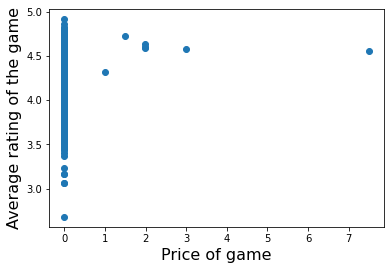

In [7]:
plt.scatter(first_df['price'], first_df['avg_rating'])
plt.xlabel('Price of game', fontsize=16)
plt.ylabel('Average rating of the game', fontsize=16)
plt.show()

#### As we can see, there are not much points for paid games. However, from this data, we can roughly tell that the 7 paid games generally all have good ratings, above 4. 
#### However, it is not to say that free games had low ratings. Some of them had higher ratings than all of the paid games. Thus there does not seem to be a clear correlation between paid/free games with ratings

### Although it would be unwise to draw any conclusions here, we won't be able to progress further than this conclusion due to the lack of unbiased, fair and sufficient data for paid games 

#### Now, we'll move onto the next question 
# 2. Which categories showcase the highest ratings

#### Let us first see what the category attribute has in store for us 

In [8]:
print(df.category.unique())
print(df.category.value_counts())

['GAME ACTION' 'GAME ADVENTURE' 'GAME ARCADE' 'GAME BOARD' 'GAME CARD'
 'GAME CASINO' 'GAME CASUAL' 'GAME EDUCATIONAL' 'GAME MUSIC' 'GAME PUZZLE'
 'GAME RACING' 'GAME ROLE PLAYING' 'GAME SIMULATION' 'GAME SPORTS'
 'GAME STRATEGY' 'GAME TRIVIA' 'GAME WORD']
GAME CARD            126
GAME WORD            104
GAME ADVENTURE       100
GAME EDUCATIONAL     100
GAME TRIVIA          100
GAME RACING          100
GAME ACTION          100
GAME MUSIC           100
GAME STRATEGY        100
GAME ROLE PLAYING    100
GAME CASUAL          100
GAME SIMULATION      100
GAME ARCADE          100
GAME CASINO          100
GAME SPORTS          100
GAME PUZZLE          100
GAME BOARD           100
Name: category, dtype: int64


#### As shown above, there are 17 unique categories
#### We shall group the categories together and seek out their average rating and plot a bar graph

In [9]:
df_second = pd.concat([df['category'], first_df['avg_rating']], axis=1, join='inner')


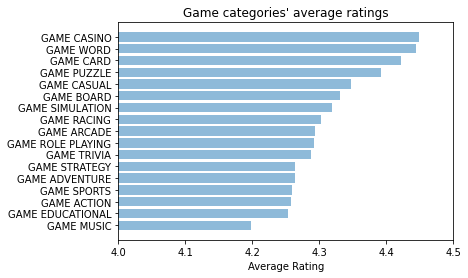

In [10]:
df_second_group = df_second.groupby('category').agg({'avg_rating': 'mean'})
y_pos = np.arange(17)
df_second_group = df_second_group.sort_values(by = 'avg_rating', axis = 0, ascending = True)
categories = list(df_second_group.index)


plt.barh(y_pos, df_second_group['avg_rating'], align='center', alpha=0.5)
plt.yticks(y_pos, categories)
plt.xlabel('Average Rating')
plt.axis(xmin= 4, xmax=4.5)
plt.title('Game categories\' average ratings')
plt.show()


#### As we can see, casino games are the most famous, along with word games and the least favorable being music games. 
#### **Through this, we could conclude that game developers designing any of the top games would have a more favorable chance to have a high rating.**
#### All of the categories have the same amount of data, with at least 100 each and the most being 126, not deviating much from the most common 100. So it would be hard to say this analysis was biased. 
#### Now let us move onto the next question 

# 3. Does rapid growth right after its release generally suggest greater ratings for the game? 

In [11]:
df_third = pd.concat([df[['growth (30 days)', 'growth (60 days)']], first_df['avg_rating']], axis=1, join='inner')
print(df_third)

      growth (30 days)  growth (60 days)  avg_rating
0                  2.1               6.9    4.216242
1                  1.8               3.6    4.304170
2                  1.5               3.2    4.126486
3                  1.4               4.4    4.265578
4                  0.8               1.5    4.329449
...                ...               ...         ...
1725               0.9               1.8    4.760191
1726               0.9               2.3    4.677241
1727               0.9               1.9    4.045402
1728               1.9               4.1    4.817627
1729               1.1               2.5    3.593839

[1730 rows x 3 columns]


##### We have to keep in mind that the growth values are expressed in percentage(%) 

#### Let us first compare the growth for 30 days with the avg_rating

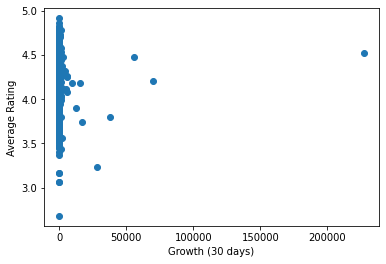

In [12]:
plt.scatter(df_third['growth (30 days)'], df_third['avg_rating'])
plt.xlabel('Growth (30 days)')
plt.ylabel('Average Rating')
plt.show()


##### There seems to be a few extreme outliers where the growth value is pretty huge. Let us take a look at those data 

In [13]:
for i in range(len(df['growth (30 days)'])):
    if df['growth (30 days)'][i] > 5000:
        print(df['title'][i])

Mini World: Block Art
Street Chaser
Durak Online
Belote.com - Free Belote Game
Dummy ดัมมี่ ไพ่แคง เกมไพ่ฟรี
GAMEE Prizes - Play Free Games, WIN REAL CASH!
Truck games for kids - build a house, car wash
Truck Driver Cargo
세븐나이츠
Soccer Star 2021 Top Leagues: Play the SOCCER game
Mobile Soccer League
Gartic
New QuizDuel!


#### A growth rate of over 5000% in 30 days seems to be very unusual and pretty unreasonable to achieve for most games. Thus we shall factor out these games to take a look at the scatter plot 

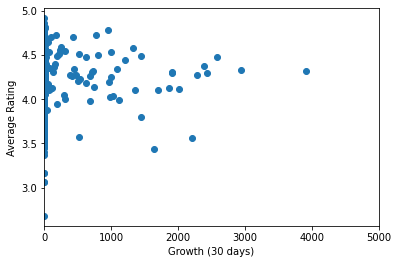

In [14]:
plt.scatter(df_third['growth (30 days)'], df_third['avg_rating'])
plt.xlabel('Growth (30 days)')
plt.ylabel('Average Rating')
plt.xlim([0, 5000])
plt.show()

#### By looking at this graph, it does not really show us any relationship. This may be due to the fact that majority of our data is clustered around low growth numbers and thus not showing up properly. So let us divide the graph into two. One with growth ranging from 0 to 100 and the other's growth ranging from 100 to 5000

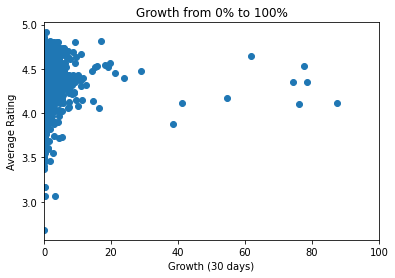

In [15]:
plt.scatter(df_third['growth (30 days)'], df_third['avg_rating'])
plt.xlabel('Growth (30 days)')
plt.ylabel('Average Rating')
plt.xlim([0, 100])
plt.title('Growth from 0% to 100%')
plt.show()

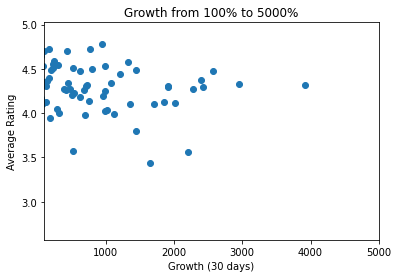

In [16]:
plt.scatter(df_third['growth (30 days)'], df_third['avg_rating'])
plt.xlabel('Growth (30 days)')
plt.ylabel('Average Rating')
plt.xlim([100, 5000])
plt.title('Growth from 100% to 5000%')
plt.show()

#### For growth from 100% to 5000%, the effect of higher growth seems to wear off as most of the games usually lie between 4 and 4.5 in average ratings. 

#### However, for growth from 0% to 100%, the effect still doesn't seem to be visible as most of the data is consolidated between 0% and 10%. So let us take a look there

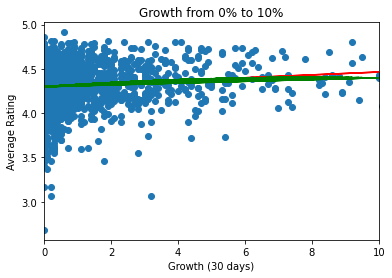

In [17]:
import math
from scipy.optimize import curve_fit 
df_four = df 
for i in range(len(df_four['growth (30 days)'])):
    if df_four['growth (30 days)'][i] > 10:
        df_four = df_four.drop(labels = i, axis = 0)
df_four['avg_rating'] = (df_four['5 star ratings']*5 + df_four['4 star ratings']*4 + df_four['3 star ratings']*3 + df_four['2 star ratings']*2 + df_four['1 star ratings']*1) / (df_four['5 star ratings'] + df_four['4 star ratings'] + df_four['3 star ratings'] + df_four['2 star ratings'] + df_four['1 star ratings'])

# Linear fit 
m, b = np.polyfit(df_four['growth (30 days)'], df_four['avg_rating'], 1)
x = df_four['growth (30 days)']

# Quadratic fit 
def f_quadratic(t,a,b,c):
    return a*pow(t,2) +b*t + c 
popt, pcov = curve_fit(f_quadratic, df_four['growth (30 days)'], df_four['avg_rating'])
quadratic_cp = f_quadratic(np.array(df_four['growth (30 days)']), *popt)


# Plotting 
plt.plot(x, m*x + b, color = 'red')
plt.plot(x, quadratic_cp, color = 'green')
plt.scatter(df_third['growth (30 days)'], df_third['avg_rating'])
plt.xlabel('Growth (30 days)')
plt.ylabel('Average Rating')
plt.xlim([0, 10])
plt.title('Growth from 0% to 10%')
plt.show()

#### The red line depicts the line of best fit and the green line depicts an attempted quadratic fit. The line of best fit shows a slight gradient, **showing a general trend of higher growth leading to higher average rating**. 
#### Additionally, I have attempted a quadratic fit as the data seemed more complicated than a simple line of best fit. However, most of the data points seems to be consolidated at the higher end of the average rating, thus resulting in a similar quadratic fit compared to the line of best fit. 

#### **Therefore, we can conclude that at the lower end of the growth percentage for 30 days, it is true that higher growth may predict a higher average rating. However, at higher values of growth levels, the effect seems to wear off.** 

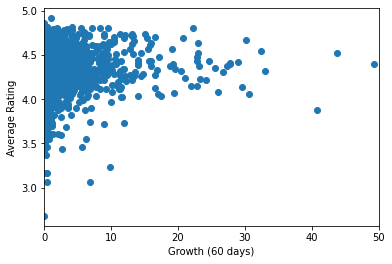

In [18]:
plt.scatter(df_third['growth (60 days)'], df_third['avg_rating'])
plt.xlabel('Growth (60 days)')
plt.ylabel('Average Rating')
plt.xlim([0,50])
plt.show()

#### Let us check out the growth for 60 days, but with a higher limit, from 0 to 50% 

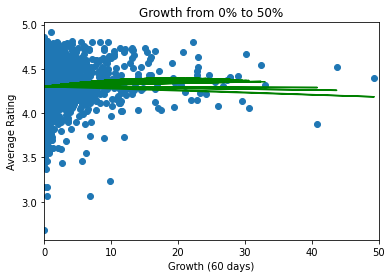

In [19]:
df_five = df 
for i in range(len(df_five['growth (60 days)'])):
    if df_five['growth (60 days)'][i] > 50:
        df_five = df_five.drop(labels = i, axis = 0)
df_five['avg_rating'] = (df_five['5 star ratings']*5 + df_five['4 star ratings']*4 + df_five['3 star ratings']*3 + df_five['2 star ratings']*2 + df_five['1 star ratings']*1) / (df_five['5 star ratings'] + df_five['4 star ratings'] + df_five['3 star ratings'] + df_five['2 star ratings'] + df_five['1 star ratings'])

# Quadratic fit 
def f_quadratic(t,a,b,c):
    return a*pow(t,2) +b*t + c 
popt, pcov = curve_fit(f_quadratic, df_five['growth (60 days)'], df_five['avg_rating'])
quadratic_cp = f_quadratic(np.array(df_five['growth (60 days)']), *popt)
x = df_five['growth (60 days)']

# Plotting 
plt.plot(x, quadratic_cp, color = 'green')
plt.scatter(df_five['growth (60 days)'], df_five['avg_rating'])
plt.xlabel('Growth (60 days)')
plt.ylabel('Average Rating')
plt.xlim([0, 50])
plt.title('Growth from 0% to 50%')
plt.show()

#### The quadratic curve doesn't seem to different from when growth is limited to 30 days. Thus the conclusion still stands as the same 

# We have looked at all of the three questions that we have set out for this article. We have concluded that basically 
### 1. There does not seem to be a clear correlation between paid/free games with ratings
### 2. Casino, Word and Card games are the most favorable and have the highest average ratings 
### 3. It is true that higher growth may predict a higher average rating. However, at higher values of growth levels, the effect seems to wear off

## Thanks for reading my article and hope to hear some valuable feedbacks if you have any! Thank you :) 